In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\hp\Documents\Datasets\New folder (3)\heart_attack_prediction_indonesia.csv')
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [6]:
df.isna().sum()

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


In [7]:
df.drop('alcohol_consumption', axis =1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  physical_activity               158355 non-null  object 
 12  dietary_habits  

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [11]:
from sklearn.preprocessing import LabelEncoder
cat = df.select_dtypes('object')
le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])

In [12]:
from sklearn.model_selection import train_test_split

y = df['heart_attack']
X = df.drop(columns=['heart_attack'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=26)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [5, 10, 15]
}
model = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best accuracy 0.7351678047429335
DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=5,
                       random_state=1)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20],
    'min_samples_split': [5, 10, 15, 20]
}
model = DecisionTreeClassifier(random_state=1)
# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best accuracy 0.7312209745438562
DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=5,
                       random_state=1)


In [29]:
model = grid_search.best_estimator_

In [31]:
pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Metrics:')
print('Model Accuracy: ', accuracy)
print('Precision :', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Metrics:
Model Accuracy:  0.7274478229294938
Precision : 0.6842400448681997
Recall Score:  0.582153650389693
F1 Score:  0.6290821588174631


In [52]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     19097
           1       0.68      0.58      0.63     12574

    accuracy                           0.73     31671
   macro avg       0.72      0.70      0.71     31671
weighted avg       0.72      0.73      0.72     31671



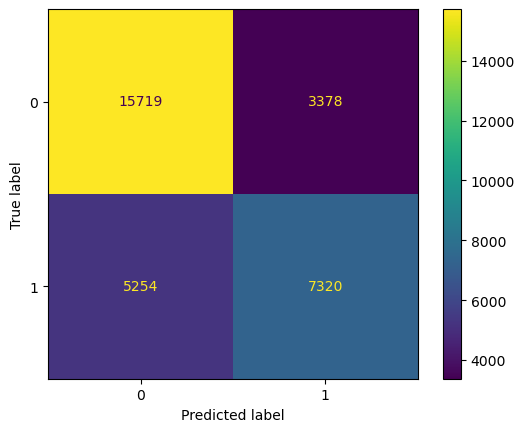

In [60]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X,y, cv=5)
scores

array([0.72605854, 0.73028954, 0.72624799, 0.73139465, 0.72792144])

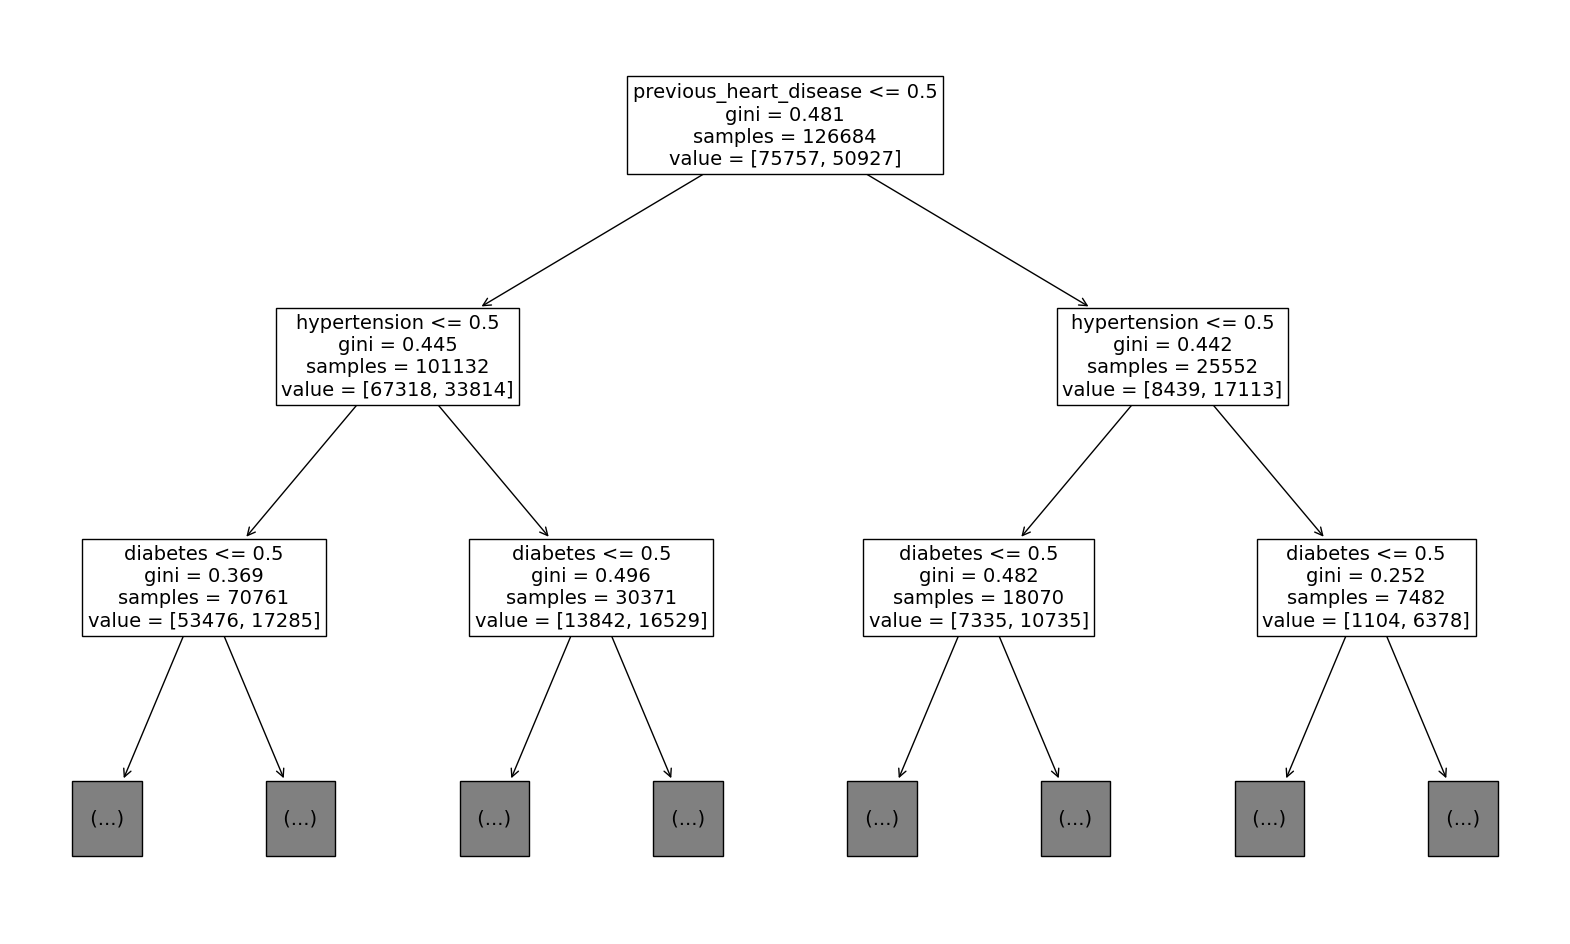

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(model, max_depth=2, fontsize=14, feature_names=X.columns);